In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

In [2]:
# check for gpu
tf.test.gpu_device_name()

'/device:GPU:0'

# Loading dataset from kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! pip install kaggle # install kaggle
! mkdir ~/.kaggle # make the kaggle directory
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ # copy the json file to directory
! chmod 600 ~/.kaggle/kaggle.json # allocate the required permission

In [5]:
# download the dataset
! kaggle datasets download -d gpiosenka/100-bird-species

100% 1.13G/1.14G [00:07<00:00, 176MB/s]
100% 1.14G/1.14G [00:07<00:00, 165MB/s]


In [6]:
# unzip the dataset
! unzip /content/100-bird-species.zip -d /content/birds

Streaming output truncated to the last 5000 lines.
  inflating: /content/birds/train/TURKEY VULTURE/144.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/145.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/146.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/147.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/148.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/149.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/150.jpg  
  inflating: /content/birds/train/TURKEY VULTURE/151.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/001.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/002.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/003.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/004.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/005.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/006.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT/007.jpg  
  inflating: /content/birds/train/TURQUOISE MOTMOT

In [7]:
birds_dataset = r'/content/birds'

train_path = os.path.join(birds_dataset, 'train')
test_path = os.path.join(birds_dataset, 'test')
validation_path = os.path.join(birds_dataset, 'valid')


# some image properties
img_height = 128
img_width = 128


In [8]:
# using tensorflow imagedatagenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the datagens
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# generator from directory

train_generator = train_datagen.flow_from_directory(train_path, target_size=(img_height, img_width),
                                                    batch_size=32,class_mode='categorical',
                                                    color_mode='rgb',seed = 42,
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory(validation_path, target_size=(img_height, img_width),
                                                batch_size=32,class_mode='categorical',
                                                color_mode='rgb',seed = 42,
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory(test_path, target_size=(img_height, img_width),
                                                  batch_size=32,class_mode='categorical',
                                                  color_mode='rgb',shuffle=True,
                                                  seed = 42)


Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


Using this method takes it really easy on the RAM and this allows us to be able to load all images in the train dataset easily without filling the RAM and we can easily visualize what has been done

(32, 128, 128, 3)
(128, 128, 3)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


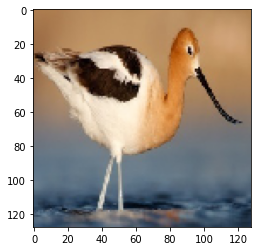

In [9]:
batch=next(train_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
print(batch[1][0]) # the class this image got classified into
plt.imshow(img) 

(32, 128, 128, 3)
(128, 128, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


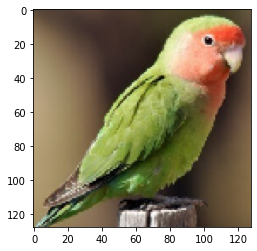

In [10]:
batch=next(test_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
print(batch[1][0]) # the class this image got classified into
plt.imshow(img)

(32, 128, 128, 3)
(128, 128, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


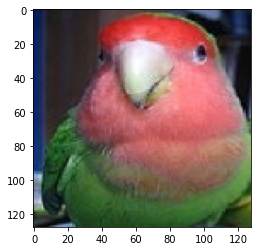

In [11]:
batch=next(val_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
print(batch[1][0]) # the class this image got classified into
plt.imshow(img)

All good. Ready to train

# ML Models

## Baseline Model

In [12]:
num_categories = 315 # we have 315 classes

In [13]:
input_shape = batch[0].shape[1:] # for the last generator batch run, the val generator
input_shape

(128, 128, 3)

In [14]:
model = models.Sequential(name='baseline_birds')
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_categories, activation='softmax'))

In [15]:
model.summary()

Model: "baseline_birds"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)   

In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birds_baseline.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps=50, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
100/100 [==============================] - 20s 102ms/step - loss: 5.7510 - acc: 0.0063 - val_loss: 5.7246 - val_acc: 0.0127
Epoch 2/100
100/100 [==============================] - 10s 99ms/step - loss: 5.5707 - acc: 0.0122 - val_loss: 5.3131 - val_acc: 0.0248
Epoch 3/100
100/100 [==============================] - 10s 101ms/step - loss: 5.2141 - acc: 0.0472 - val_loss: 4.9498 - val_acc: 0.0667
Epoch 4/100
100/100 [==============================] - 10s 102ms/step - loss: 4.7919 - acc: 0.0803 - val_loss: 4.3210 - val_acc: 0.1314
Epoch 5/100
100/100 [==============================] - 10s 101ms/step - loss: 4.2765 - acc: 0.1394 - val_loss: 3.9050 - val_acc: 0.1803
Epoch 6/100
100/100 [==============================] - 10s 103ms/step - loss: 3.9166 - acc: 0.1937 - val_loss: 3.5032 - val_acc: 0.2546
Epoch 7/100
100/100 [==============================] - 10s 100ms/step - loss: 3.6776 - acc: 0.2294 - val_loss: 3.2343 - val_acc: 0.2895
Epoch 8/100
100/100 [============================

Early stopping kicked in and it stopped at 59 epochs.



### Evaluating the performance

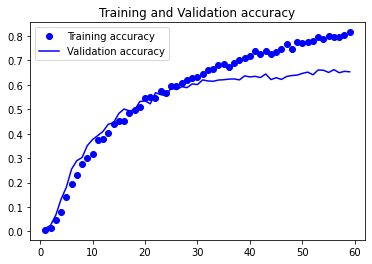

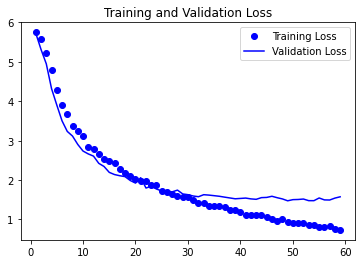

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

We can see a little bit of overfitting starting to happen on the train set

In [19]:
# let's see how it performs on the test set

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc: ', round(test_acc*100, 2),  '%')

50/50 [==============================] - 3s 60ms/step - loss: 1.3851 - acc: 0.6749
test acc:  67.49 %


We were able to reach an accuracy of 67.49% with our base model.
Let's finetune our model by applying image data augmentation

In [25]:
# let's copy the saved model to google drive

!cp '/content/birds_baseline.h5' '/content/drive/MyDrive'

## Model 2 - using Image Data Augmentation

In [41]:
# we will do image augmentation on the train set but not on the validation set

# create the datagen
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True)


# for every file in the train directory

train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True, seed = 42)


Found 45980 images belonging to 315 classes.


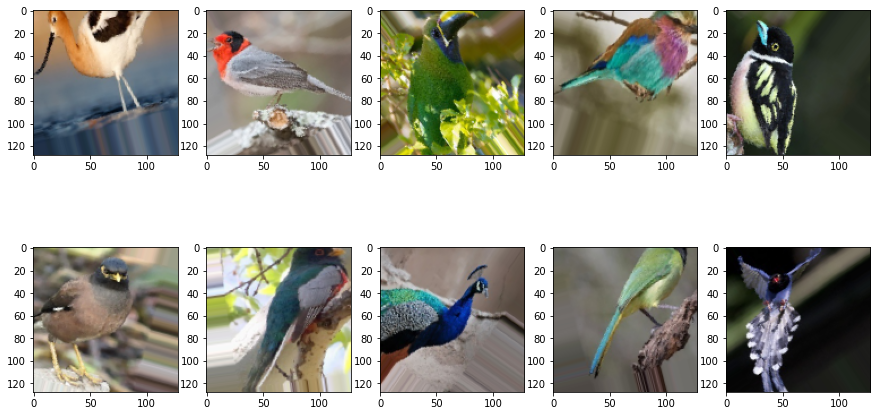

In [42]:
# let's visualize what just happened

# create the plot
plt.figure(figsize=(15, 8))


for i in range(10):
  # create 10 subplots
  plt.subplot(2, 5, i+1)
  batch = next(train_generator)
  
  # batch[0] represents images, and batch[1] represent labels
  image = batch[0][i]
  plt.imshow(image)


plt.show()

In [67]:
# let's train the model
model = models.Sequential(name='image_augment_birds')
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_categories, activation='softmax'))

In [68]:
model.summary()

Model: "image_augment_birds"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 14, 14, 12

In [69]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birds_baseline.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [70]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps=50, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
100/100 [==============================] - 23s 225ms/step - loss: 5.7550 - acc: 0.0031 - val_loss: 5.7260 - val_acc: 0.0051
Epoch 2/100
100/100 [==============================] - 22s 222ms/step - loss: 5.6395 - acc: 0.0091 - val_loss: 5.5200 - val_acc: 0.0140
Epoch 3/100
100/100 [==============================] - 22s 221ms/step - loss: 5.4934 - acc: 0.0169 - val_loss: 5.2559 - val_acc: 0.0273
Epoch 4/100
100/100 [==============================] - 22s 222ms/step - loss: 5.2580 - acc: 0.0219 - val_loss: 4.9976 - val_acc: 0.0375
Epoch 5/100
100/100 [==============================] - 22s 222ms/step - loss: 5.0505 - acc: 0.0344 - val_loss: 4.7033 - val_acc: 0.0476
Epoch 6/100
100/100 [==============================] - 22s 222ms/step - loss: 4.8613 - acc: 0.0503 - val_loss: 4.5648 - val_acc: 0.0775
Epoch 7/100
100/100 [==============================] - 22s 222ms/step - loss: 4.7682 - acc: 0.0569 - val_loss: 4.3423 - val_acc: 0.0978
Epoch 8/100
100/100 [===========================

From what we see, this barely did even worse than the baseline model. So this has been a failure. Let's explore other ways to achieve a better result

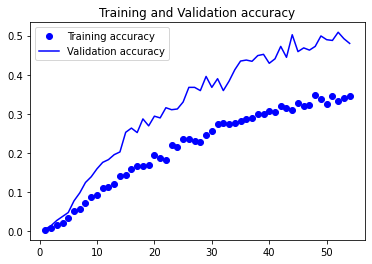

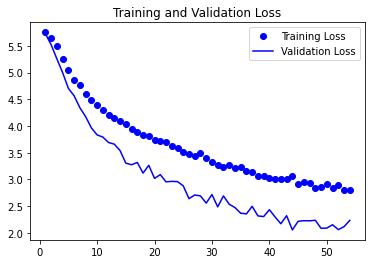

In [72]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [73]:
# let's see how it performs on the test set

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc: ', round(test_acc*100, 2),  '%')

50/50 [==============================] - 4s 77ms/step - loss: 1.9846 - acc: 0.5302
test acc:  53.02 %


Again, we did worse than the baseline model here.

In [74]:
model.save('image_augment_birds.h5')

In [75]:
# let's copy the saved model to google drive

!cp '/content/image_augment_birds.h5' '/content/drive/MyDrive'


## Model 3 - Using a pretrained model by Feature Extraction with Data Augmentation


In this method, We use the pretrained network (conv_base), add Dense layers for our classifier on top of it and run the whole thing together.

In [76]:
# let's load the VGG16 model trained on the imagenet dataset
from tensorflow.keras.applications import VGG16

# include top is false so as not to include the Dense classifiers of ImageNet
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [77]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [78]:
model = models.Sequential()
model.add(conv_base) # add the pretrained network
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(num_categories, activation='softmax'))

In [79]:
# when learning to to classify into our categories, we need to ensure that the conv_base doesn't train, so we freeze it

conv_base.trainable = False

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_15 (Flatten)        (None, 8192)              0         
                                                                 
 dense_32 (Dense)            (None, 2048)              16779264  
                                                                 
 dropout_23 (Dropout)        (None, 2048)              0         
                                                                 
 dense_33 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_24 (Dropout)        (None, 2048)              0         
                                                                 
 dense_34 (Dense)            (None, 315)               6

In [81]:
# our augmentation code again
# remember not to augment validation set


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True)


# for every file in the directory

train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True, seed = 42)
                                              
  

Found 45980 images belonging to 315 classes.


In [82]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birds_baseline.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [83]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps=50, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
100/100 [==============================] - 32s 272ms/step - loss: 5.9978 - acc: 0.0034 - val_loss: 5.7634 - val_acc: 0.0044
Epoch 2/100
100/100 [==============================] - 25s 253ms/step - loss: 5.7572 - acc: 0.0044 - val_loss: 5.7551 - val_acc: 0.0019
Epoch 3/100
100/100 [==============================] - 24s 244ms/step - loss: 5.7529 - acc: 0.0037 - val_loss: 5.7762 - val_acc: 0.0032
Epoch 4/100
100/100 [==============================] - 25s 249ms/step - loss: 5.7532 - acc: 0.0056 - val_loss: 5.7563 - val_acc: 0.0032
Epoch 5/100
100/100 [==============================] - 25s 245ms/step - loss: 5.7479 - acc: 0.0041 - val_loss: 5.7639 - val_acc: 0.0044
Epoch 6/100
100/100 [==============================] - 25s 247ms/step - loss: 5.7448 - acc: 0.0044 - val_loss: 5.7595 - val_acc: 0.0032
Epoch 7/100
100/100 [==============================] - 24s 244ms/step - loss: 5.7489 - acc: 0.0063 - val_loss: 5.7607 - val_acc: 0.0032
Epoch 8/100
100/100 [===========================

Unsurprisingly, we have a poor result from this data augmentation step as well. We'll investigate on the data augmentation step later to investigate what happened.

In [84]:
model.save('birds_image_augment_pretrained.h5')

In [85]:
# let's copy the saved model to google drive

!cp 'birds_image_augment_pretrained.h5' '/content/drive/MyDrive'

In [86]:
# let's see how it performs on the test set

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc: ', round(test_acc*100, 2),  '%')

50/50 [==============================] - 5s 88ms/step - loss: 5.7616 - acc: 0.0025
test acc:  0.25 %


## Model 4 - Finetuning a pretrained network

Ths involves:

a. Add your custom network on top of a pretrained base network.

b. Freeze the base network.

c. Train the part you added.

d. Unfreeze some layers in the base network.

e. Jointly train both these layers and the part you added.

In this case, we added the conv_base (froze the entire base, unfroze the top layers, added the Dense layers from the "Feature extraction by Data Augmentation part (already trained)" and trained the Dense layers & unfrozen layers together

In [87]:
# load the VGG16 model again

#include_top is False so it doesn't include the Dense classifer of the Imagenet
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3)) 

In [88]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [89]:
# let's freeze up to the last 3 layers. This means the first layers in the conv_base would be stopped from training

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        conv_base.trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [90]:
# now let's see the number of trainable parameters
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [91]:
model = models.Sequential(name='birds_pretrained_vgg16')
model.add(conv_base) # add the pretrained network
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(num_categories, activation='softmax'))

In [92]:
model.summary()

Model: "birds_pretrained_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_16 (Flatten)        (None, 8192)              0         
                                                                 
 dense_35 (Dense)            (None, 2048)              16779264  
                                                                 
 dropout_25 (Dropout)        (None, 2048)              0         
                                                                 
 dense_36 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_26 (Dropout)        (None, 2048)              0         
                                                                 
 dense_37 (Dense)            (None, 315)    

In [93]:
# we must set a very small learning rate so as not to destroy the weights learned by the Vgg16 model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(1e-5)

In [94]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birds_baseline.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

In [95]:
# since the train_generator in memory refers to the image data augmented one, let's define it again

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    seed = 42,
                                                    shuffle=True
                                                    )


Found 45980 images belonging to 315 classes.


In [99]:
history = model.fit(train_generator, epochs=35, steps_per_epoch=500, validation_data=val_generator,
                    validation_steps=50, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/35
500/500 [==============================] - 144s 287ms/step - loss: 5.4941 - acc: 0.0214 - val_loss: 4.9998 - val_acc: 0.0762
Epoch 2/35
500/500 [==============================] - 144s 287ms/step - loss: 4.9269 - acc: 0.0625 - val_loss: 4.0352 - val_acc: 0.2133
Epoch 3/35
500/500 [==============================] - 144s 287ms/step - loss: 4.3081 - acc: 0.1343 - val_loss: 3.3280 - val_acc: 0.3137
Epoch 4/35
500/500 [==============================] - 144s 287ms/step - loss: 3.7397 - acc: 0.2111 - val_loss: 2.6818 - val_acc: 0.4102
Epoch 5/35
500/500 [==============================] - 144s 288ms/step - loss: 3.2713 - acc: 0.2834 - val_loss: 2.1959 - val_acc: 0.4965
Epoch 6/35
500/500 [==============================] - 144s 288ms/step - loss: 2.9210 - acc: 0.3410 - val_loss: 1.8476 - val_acc: 0.5829
Epoch 7/35
500/500 [==============================] - 144s 288ms/step - loss: 2.6224 - acc: 0.4004 - val_loss: 1.5455 - val_acc: 0.6292
Epoch 8/35
500/500 [============================

We made a mistake in where to save callbacks but let's save the model and it's all good

In [100]:
model.save('birds_final_model.h5')

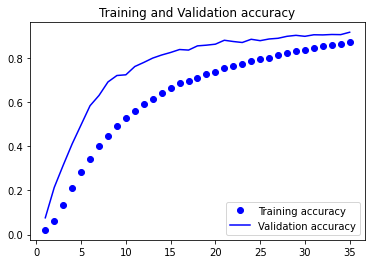

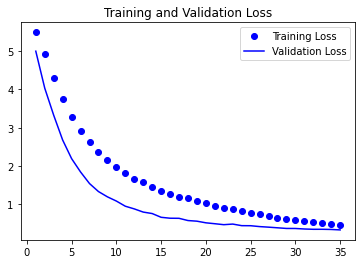

In [101]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [102]:
# let's see how it performs on the test set

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc: ', round(test_acc*100, 2),  '%')

50/50 [==============================] - 5s 95ms/step - loss: 0.2469 - acc: 0.9232
test acc:  92.32 %


In [103]:
# let's copy the saved model to google drive

!cp 'birds_final_model.h5' '/content/drive/MyDrive'

All done. We reached a test accuracy of 92% on the test set.